#### BUSINESS CHALLENGE

New DG Food Agro are a multinational exporter of various grains from India since nearly 130 years. But their main product of exporting since early 1980s has been Wheat. They export wheat to countries like America, Afghanistan, Australia etc. They started seeing varying exports of sales year on year for various countries. The reason that was theorized by them had a lot of natural causes like floods, country growth, population explosion etc. Now they need to decide which countries fall in the same range of export and which don’t. They also need to know which countries export is low and can be improved and which countries are performing very well across the years.

The data provided right now is across 18 years. What they need is a repeatable solution which won’t get affected no matter how much data is added across time and that they should be able to explain the data across years in less number of variables.

Objective: Our objective is to cluster the countries based on various sales data provided to us across years. We have to apply an unsupervised learning technique like K means or Hierarchical clustering so as to get the final solution. But before that we have to bring the exports (in tons) of all countries down to same scale across years. Plus, as this solution needs to be repeatable we will have to do PCA so as to get the principal components which explain max variance. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Get the Data
df = pd.read_csv('Wheat.csv', index_col = 0, thousands  = ',')
df.index.names = ['country']
df.columns.names = ['year']
df.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [3]:
df.isnull().sum()

year
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
dtype: int64

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
existing_2d = pca.transform(df)

In [9]:
df_2d = pd.DataFrame(existing_2d)
df_2d.index = df.index
df_2d.columns = ['PC1','PC2']
df_2d.head()

,PC1,PC2
country,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736


In [10]:
print(pca.explained_variance_ratio_)

[0.91808789 0.060556  ]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


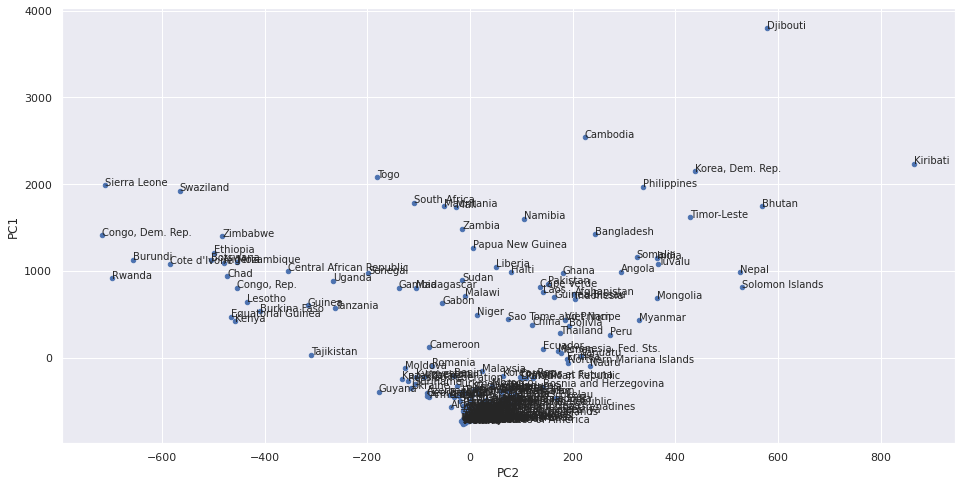

In [14]:
%matplotlib inline

ax = df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, country in enumerate(df.index):
    ax.annotate(country, (df_2d.iloc[i].PC2, df_2d.iloc[i].PC1))

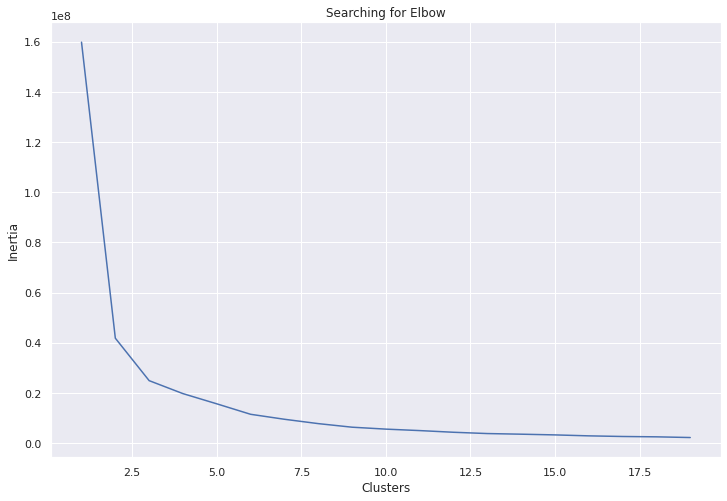

In [18]:
from sklearn.cluster import KMeans
import seaborn as sns

clusters = []

for i in range(1, 20):
    km = KMeans(n_clusters=i).fit(existing_2d)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 20)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

#### Numbers of Clusters can be 2 or 3

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(df)

In [20]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 50, 1: 16, 2: 141}


In [37]:
result_df = pd.concat([df, df_2d], axis=1, sort=False)
result_df['cluster'] = pd.Series(clusters.labels_, index=df.index)
result_df.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster,PC1,PC2
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,0,732.215864,203.381494
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,2,-613.296510,4.715978
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,2,-569.303713,-36.837051
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,2,-717.082766,5.464696
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,2,-661.802241,11.037736


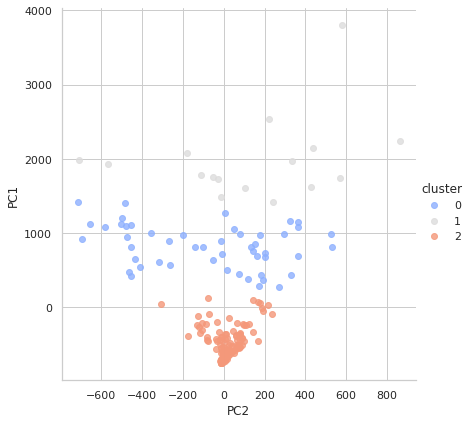

In [25]:
sns.set_style('whitegrid')
sns.lmplot('PC2','PC1',data=result_df, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

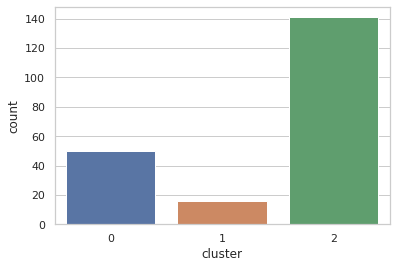

In [26]:
import seaborn as sns
sns.countplot(result_df['cluster'],label="Count")
plt.show()

In [40]:
 result_df = result_df.reset_index()

In [43]:
result_df[result_df['cluster'] == 1]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster,PC1,PC2
15,Bangladesh,639,623,608,594,579,576,550,535,516,492,500,491,478,458,444,416,392,387,1,1422.800603,242.722083
22,Bhutan,924,862,804,750,699,651,620,597,551,538,515,512,472,460,443,412,406,363,1,1742.709249,569.448954
32,Cambodia,928,905,881,858,836,811,810,789,777,764,758,750,728,712,696,676,672,664,1,2538.953258,223.864004
51,"Korea, Dem. Rep.",841,828,815,802,788,775,775,775,775,770,713,650,577,527,499,508,500,441,1,2146.623299,438.945977
54,Djibouti,1485,1477,1463,1442,1414,1381,720,669,698,701,761,775,932,960,1034,1046,1093,1104,1,3798.447446,578.975277
96,Kiribati,1026,1006,986,966,947,928,910,853,571,556,546,607,587,477,439,419,405,423,1,2234.809790,864.494075
111,Mali,640,631,621,609,597,583,573,566,565,567,571,573,572,578,584,589,593,599,1,1732.257902,-28.197847
113,Mauritania,585,587,590,592,594,595,622,615,612,615,619,624,632,642,494,565,556,559,1,1746.666128,-51.540677
123,Namibia,650,685,687,683,671,658,387,395,411,442,481,506,544,560,572,570,556,532,1,1601.720101,105.968321
143,Philippines,799,783,766,750,735,719,705,689,669,649,600,578,561,542,534,520,505,500,1,1971.702345,337.221038


## Based on Cluster Analysis following are the Largest Importer Countries 

In [45]:
list(result_df.loc[result_df['cluster']==1, 'country'])

['Bangladesh',
 'Bhutan',
 'Cambodia',
 'Korea, Dem. Rep.',
 'Djibouti',
 'Kiribati',
 'Mali',
 'Mauritania',
 'Namibia',
 'Philippines',
 'Sierra Leone',
 'South Africa',
 'Swaziland',
 'Timor-Leste',
 'Togo',
 'Zambia']

## Out these above importers **Djibouti**, **Kiribati** are the largest importers 

In [47]:
result_df[result_df['cluster'] == 2].head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster,PC1,PC2
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,2,-613.296510,4.715978
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,2,-569.303713,-36.837051
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,2,-717.082766,5.464696
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,2,-661.802241,11.037736
6,Anguilla,38,38,37,37,36,35,35,36,36,36,35,35,35,35,35,34,34,34,2,-618.891169,-14.502928


### **Countries whose export is low and can be improved are given below**

In [48]:
list(result_df.loc[result_df['cluster']==2, 'country'])

['Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bosnia and Herzegovina',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chile',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guyana',
 'Honduras',
 'Hungary',
 'Iceland',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lebanon',
 'Libyan Arab Jamahiriya',
 'Lithuania',
 'Luxembourg',
 